## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Part 1 as model to check manula calculations!

## a) Naive Bayes Classifier

We have Car data provided in this link (https://docs.google.com/spreadsheets/d/11v5X6ZQw7YVL0EOpsdt4BWR3uwEz4YB5/edit?usp=drive_link) collected and the dataset contains three features.

Load Data, Drop extra column.
The target attribute is marked Stolen, which indicates whether a specific car is stolen or not.Assign the traget Y

In [ ]:
# Load the table
data = pd.read_excel('/content/Car Data.xlsx')

# Drop the "Example No." column
data = data.drop('Example No.', axis=1)

# Separate features (X) and target variable (y)
X = data.drop('Stolen', axis=1)
Y = data['Stolen']

In [ ]:
data.head(10)

Encode the data. Apply one-hot encoding to the features (X)

In [ ]:
# Apply one-hot encoding to the features (X)
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train the Naive Bayes classifier
Using Naive Bayes Classifier to classify a new instance

In [ ]:
# Train the Naive Bayes classifier
naive_bayes = CategoricalNB()
naive_bayes.fit(X_encoded, Y)

CategoricalNB()

New Instance = (Blue, SUV, Domestic).
Encode the instance
Predict into (Yes or No).

In [ ]:
# Define the new instance for classification
new_instance = pd.DataFrame({'Color': ['Blue'], 'Type': ['SUV'], 'Origin': ['Domestic']})

# Apply one-hot encoding to the new instance
new_instance_encoded = encoder.transform(new_instance)

# Make predictions for the new instance
predictions = naive_bayes.predict(new_instance_encoded)

# Display the predicted class
print("Predicted Class: ", predictions[0])

Predicted Class:  No


Please include the detailed calculation process.

**Calculations!!!!**

All Calculations are in the report

## b) The rejection area

Consider the loss table, which contains three actions and two classes. Calculate the expected risk of three actions, and determine the rejection area of P(Class1| x).

In [ ]:
# Convert the loss table to a NumPy array
loss_table = np.array([[0, 6], [3, 0], [2, 2]])

# Calculate the expected risk of each action
expected_risk = np.sum(loss_table, axis=1) / np.sum(loss_table)

# Determine the rejection area of P(Class1| x)
rejection_area = expected_risk[2]

# Display the expected risk and rejection area
print("Expected Risk:")
print("Action a1:", expected_risk[0])
print("Action a2:", expected_risk[1])

print("\n Rejection Area of P(Class1| x):", rejection_area)

Expected Risk:
Action a1: 0.46153846153846156
Action a2: 0.23076923076923078

 Rejection Area of P(Class1| x): 0.3076923076923077


#Part 2

## Load the data

In [ ]:
#loading the data
data = pd.read_csv('/content/spambase.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## a) Split the dataset 1

 Split the dataset into two parts as training data and test data. first 80 percent samples should be selected as training data and last 20 percent samples should be selected as test data.

In [ ]:
#splitting the data as reuested using data slicing technique and creating the classifiers
split_index = int(0.8 * len(data))

train_data_a = data[:split_index]
test_data_a = data[split_index:]

x_train_a = train_data_a.drop(columns=[57])
y_train_a = train_data_a[57]

x_test_a = test_data_a.drop(columns=[57])
y_test_a = test_data_a[57]

gnb = GaussianNB()
gnb.fit(x_train_a, y_train_a)

mnb = MultinomialNB()
mnb.fit(x_train_a, y_train_a)

MultinomialNB()

Compute the confusion matrix and the accuracy of test data for Gaussian
and Multinomial Naive Bayes Classifiers

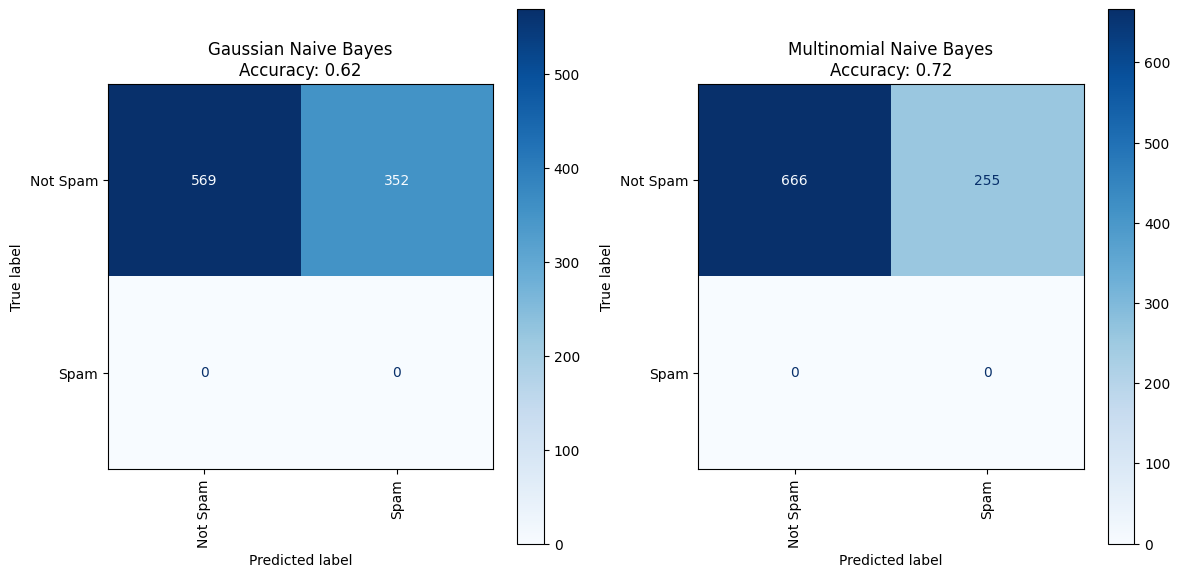

In [ ]:
#predicting the outputs and calculating the accuracy of the models and creating the confusion matrix for evaluation
y_pred_gnb_a = gnb.predict(x_test_a)
cm_gnb_a = confusion_matrix(y_test_a, y_pred_gnb_a)
accuracy_gnb_a = accuracy_score(y_test_a, y_pred_gnb_a)

y_pred_mnb_a = mnb.predict(x_test_a)
cm_mnb_a = confusion_matrix(y_test_a, y_pred_mnb_a)
accuracy_mnb_a = accuracy_score(y_test_a, y_pred_mnb_a)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp_gnb_a = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_a, display_labels=["Not Spam", "Spam"])
disp_gnb_a.plot(ax=axes[0], cmap='Blues', xticks_rotation='vertical')
axes[0].set_title("Gaussian Naive Bayes\nAccuracy: {:.2f}".format(accuracy_gnb_a))

disp_mnb_a = ConfusionMatrixDisplay(confusion_matrix=cm_mnb_a, display_labels=["Not Spam", "Spam"])
disp_mnb_a.plot(ax=axes[1], cmap='Blues', xticks_rotation='vertical')
axes[1].set_title("Multinomial Naive Bayes\nAccuracy: {:.2f}".format(accuracy_mnb_a))

plt.tight_layout()
plt.show()

## b) Split the dataset using train test split function

Use train test split function on input and output of the whole data and utilize 80% of samples as train and 20% of samples as test data.

In [ ]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [ ]:
x = data.drop(57,axis=1)
y = data[57]

In [ ]:
x_train_b , x_test_b , y_train_b ,y_test_b = train_test_split(x,y,stratify = y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the guassian and Multinomial Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(x_train_b,y_train_b)

mnb = MultinomialNB()
mnb.fit(x_train_b,y_train_b)

MultinomialNB()

Compute the confusion matrix and the accuracy of test data for Gaussian and Multinomial Naive Bayes Classifiers

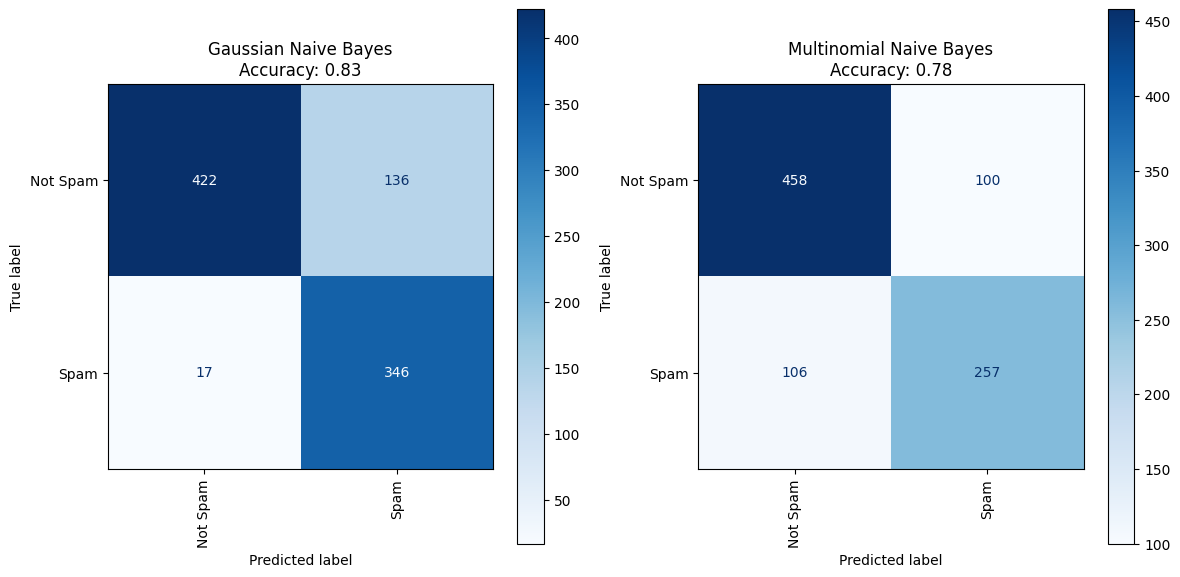

In [ ]:
y_pred_gnb = gnb.predict(x_test_b)
cm_gnb = confusion_matrix(y_test_b, y_pred_gnb)
accuracy_gnb = accuracy_score(y_test_b, y_pred_gnb)

y_pred_mnb = mnb.predict(x_test_b)
cm_mnb = confusion_matrix(y_test_b, y_pred_mnb)
accuracy_mnb = accuracy_score(y_test_b, y_pred_mnb)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=["Not Spam", "Spam"])
disp_gnb.plot(ax=axes[0], cmap='Blues', xticks_rotation='vertical')
axes[0].set_title("Gaussian Naive Bayes\nAccuracy: {:.2f}".format(accuracy_gnb))

disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=["Not Spam", "Spam"])
disp_mnb.plot(ax=axes[1], cmap='Blues', xticks_rotation='vertical')
axes[1].set_title("Multinomial Naive Bayes\nAccuracy: {:.2f}".format(accuracy_mnb))

plt.tight_layout()
plt.show()

## c)  Another Naive Bayes classifier

Use another Naive Bayes classifier of your choice to check for the improvement in terms of accuarcy score of test data in (b) over Gaussian and Multinomial asked in (b)

In [ ]:
# Initialize and train the Bernoulli Naive Bayes classifier
bern = BernoulliNB(alpha=1.0, fit_prior=True)
bern.fit(x_train_b, y_train_b)
y_pred_bern = bern.predict(x_test_b)

accuracy = accuracy_score(y_test_b, y_pred_bern)
print("Accuracy:", accuracy)

Accuracy: 0.8762214983713354


Provide an explanation for the improvement in performance (if any).

>The Bernoulli Naive Bayes classifier might have achieved better accuracy in the previous problem compared to Gaussian and Multinomial Naive Bayes classifiers due to the following reasons:
<br>1) Binary Feature Representation as it assume features are binary and it will suited with the binary feature representation.
<br>2) Handling Irrelevant Features as it considers the presence or absence of features, disregarding their frequency or intensity.


Provide classification report in terms of precision, recall and F1-score.

In [ ]:
#generating the classification report
report = classification_report(y_test_b, y_pred_bern)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       558
           1       0.87      0.80      0.84       363

    accuracy                           0.88       921
   macro avg       0.88      0.86      0.87       921
weighted avg       0.88      0.88      0.88       921



Display the confusion matrix for only the selected classifier

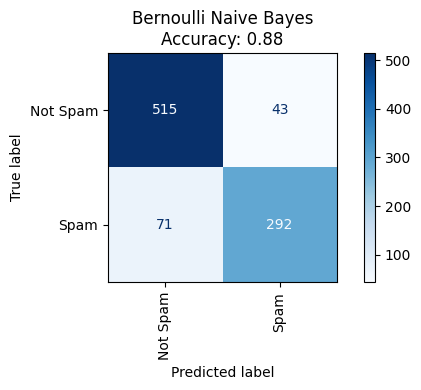

In [ ]:
#drawing the confusion matrix
cm_bern = confusion_matrix(y_test_b, y_pred_bern)
fig, ax = plt.subplots(figsize=(6, 4))
disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_bern, display_labels=["Not Spam", "Spam"])
disp_mnb.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
ax.set_title("Bernoulli Naive Bayes\nAccuracy: {:.2f}".format(accuracy))
plt.tight_layout()
plt.show()

## d) Split the data into four equal parts

Take same first 80 percent as asked in (a) training samples and split the data
into four equal parts

according to order such as the first 25% of training data
(subset 1), the second 25% of training data (subset 2), the third 25% of training
data (subset 3) and the fourth 25% of training data (subset 4).

In [ ]:
#splitting the part A training data into 4 equal subsets
split_index = int(len(train_data_a))
subset_size = int(split_index * 0.25)

subset_1 = data[:subset_size]
subset_2 = data[subset_size:2*subset_size]
subset_3 = data[2*subset_size:3*subset_size]
subset_4 = data[3*subset_size:split_index]

x_subset_1 = subset_1.drop(columns=[57])
y_subset_1 = subset_1[57]

x_subset_2 = subset_2.drop(columns=[57])
y_subset_2 = subset_2[57]

x_subset_3 = subset_3.drop(columns=[57])
y_subset_3 = subset_3[57]

x_subset_4 = subset_4.drop(columns=[57])
y_subset_4 = subset_4[57]

Train selected classifier chosen in (c) for each subset and predict the accuracy score by evaluating on last 20 percent of test data assumed in (a).

In [ ]:
#fitting the bernoulli model ont he 4 subsets and generating accuracy scores for each subset
accuracy_scores = []
for i in range(1,5):
  x = globals()['x_subset_'+str(i)]
  y = globals()['y_subset_'+str(i)]
  bern.fit(x,y)
  y_pred = bern.predict(x_test_a)
  accuracy_scores.append(accuracy_score(y_test_a,y_pred))

Plot bar chart to show all subsets’ accuracy on the figure.

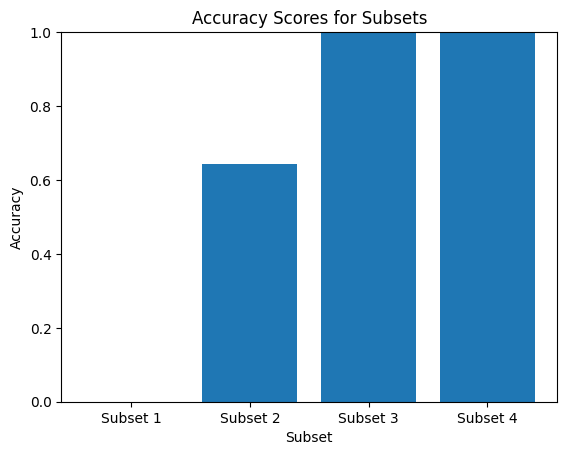

In [ ]:
#plotting bar plot for the accuracy scores of the 4 subsets
subset_labels = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4']

plt.bar(subset_labels, accuracy_scores)
plt.xlabel('Subset')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Subsets')
plt.ylim(0, 1)
plt.show()

 ### Add your comment

> As we can see:
<br>1)The first subset training data set didn't provide the model with a variation between the spam and not spam classes as the first portion of the data are all from '1' class.
<br>2)For the second subset it did contain a small portion of the '0' class so the model was able to capture some more info to classify better and did increase the accuracy .
<br>3) For the third and fourth subset the accuracy was 100% because the test data is all from the '0' class as the subsets so they were most likely to assign all the coming predictions to class '0'.

